In [101]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [81]:
input_file = '/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN_true/prediction_values_inputs_14_100files.hdf5'

### Import Files ###
f = h5py.File(input_file, 'r')
features_DC = f['features_DC'][:]
features_IC = f['features_IC'][:]
labels = f['Y_test_use'][:]
cnn = f['Y_predicted'][:]
all_weights = f['weights_test'][:]
f.close()
del f

In [82]:
print(features_DC.shape)
print(features_IC.shape)

(284184, 8, 60, 5)
(284184, 19, 60, 5)


In [83]:
weights = all_weights[:,8]/10.
true_energy = labels[:,0]
cnn_energy = cnn[:,0]

In [84]:
true_1015 = np.logical_and(true_energy > 10, true_energy < 15)
cnn_815 = np.logical_and(cnn_energy > 8, cnn_energy < 15)
cnn_lt8 = cnn_energy < 8

In [85]:
mask_hits_DC = features_DC[:,:,:,0] > 0
mask_hits_IC1 = features_IC[:,:9,:,0] > 0 
mask_hits_IC2 = features_IC[:,10:,:,0] > 0 
mask_hits_36 = features_IC[:,9,:,0] > 0 

In [86]:
mask_hits_IC = np.concatenate((mask_hits_IC1, mask_hits_IC2),axis=1)

In [87]:
print(mask_hits_DC.shape)
print(mask_hits_IC.shape)
print(mask_hits_36.shape)

(284184, 8, 60)
(284184, 18, 60)
(284184, 60)


In [88]:
# hits per event
number_hits_DC = np.sum(mask_hits_DC,axis=(1,2))
number_hits_IC = np.sum(mask_hits_IC,axis=(1,2))
number_hits_36 = np.sum(mask_hits_36,axis=1)

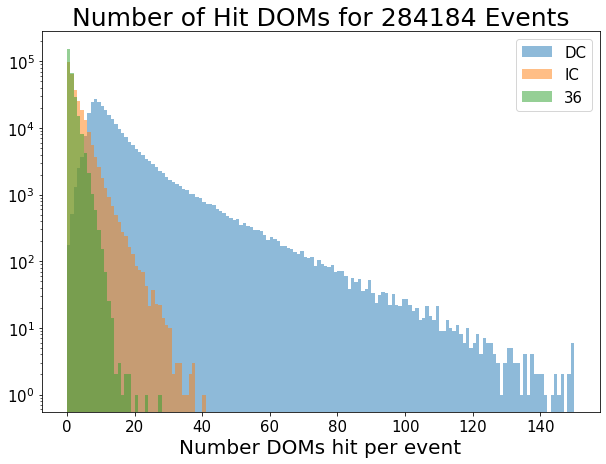

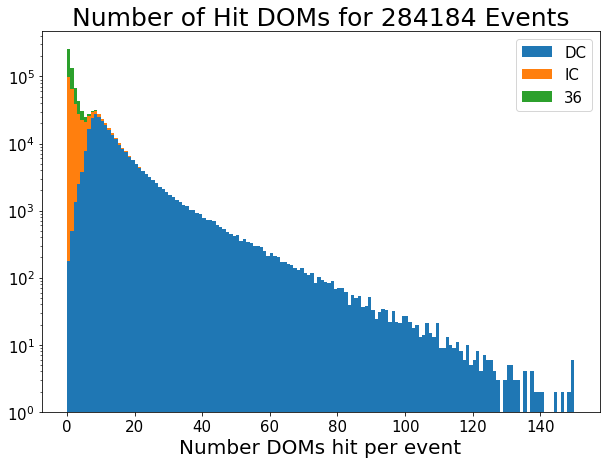

In [90]:
bins=150
amin=0
amax = 150
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC, label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC, label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36, label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("Number of Hit DOMs for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC,number_hits_IC,number_hits_36), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("Number of Hit DOMs for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# True Energy 10-15 GeV

43081

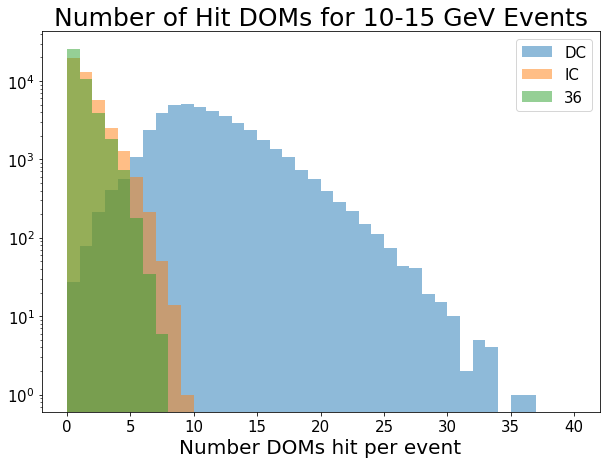

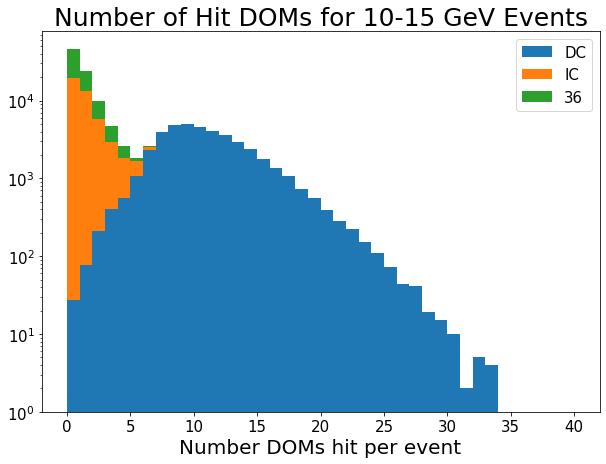

In [116]:
mask = true_1015
title="Number of Hit DOMs for 10-15 GeV Events"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC[mask],number_hits_IC[mask],number_hits_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

sum(mask)

# True Energy 8-15 GeV and CNN 8-15 GeV

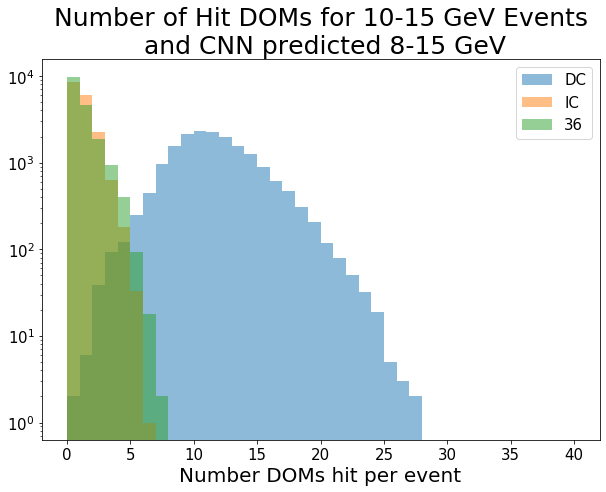

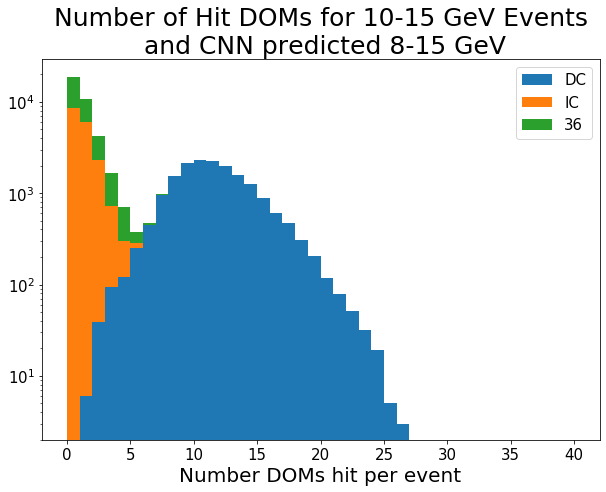

In [92]:
mask = true_1015 & cnn_815
title="Number of Hit DOMs for 10-15 GeV Events\n and CNN predicted 8-15 GeV"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC[mask],number_hits_IC[mask],number_hits_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# True Energy 8-15 GeV and CNN < 8 GeV

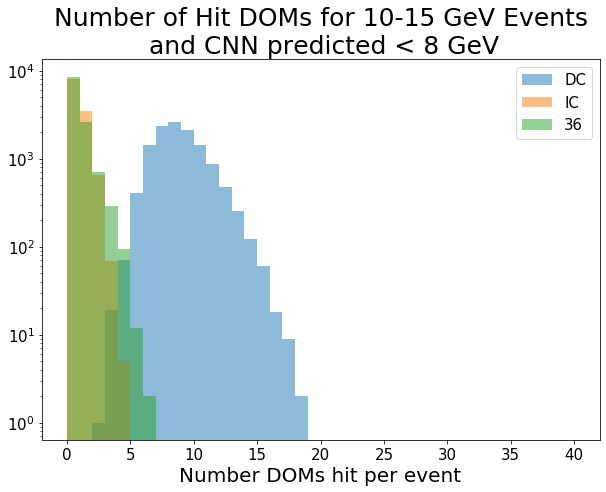

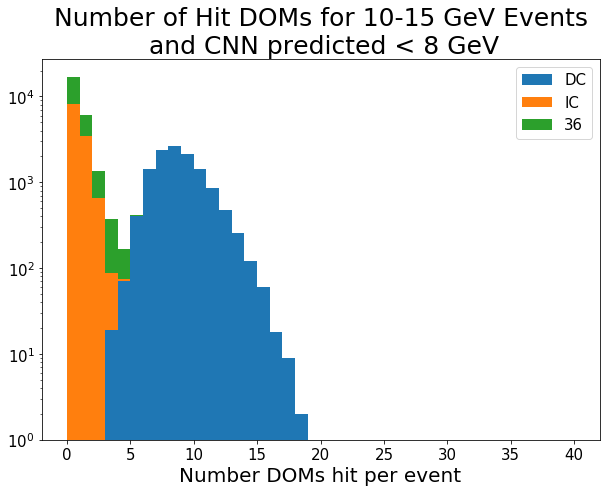

In [93]:
mask = true_1015 & cnn_lt8
title="Number of Hit DOMs for 10-15 GeV Events\n and CNN predicted < 8 GeV"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC[mask],number_hits_IC[mask],number_hits_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Compare IC to itself

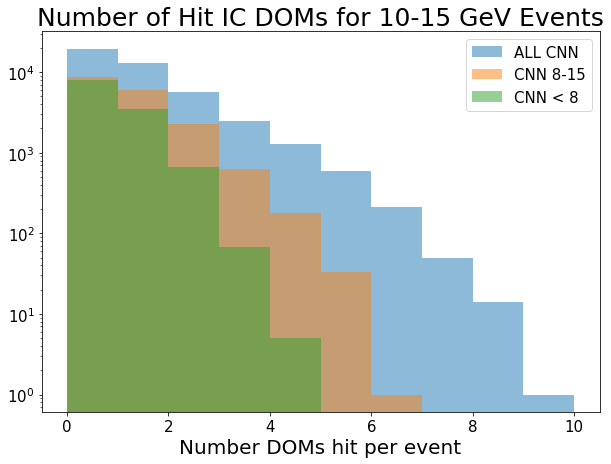

In [94]:
mask1 = true_1015
mask2 = true_1015 & cnn_815
mask3 = true_1015 & cnn_lt8
title="Number of Hit IC DOMs for 10-15 GeV Events"
bins=10
amin=0
amax = 10
plt.figure(figsize=(10,7))
plt.hist(number_hits_IC[mask1], label="ALL CNN",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask2], label="CNN 8-15",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask3], label="CNN < 8",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Compare DC to Itself

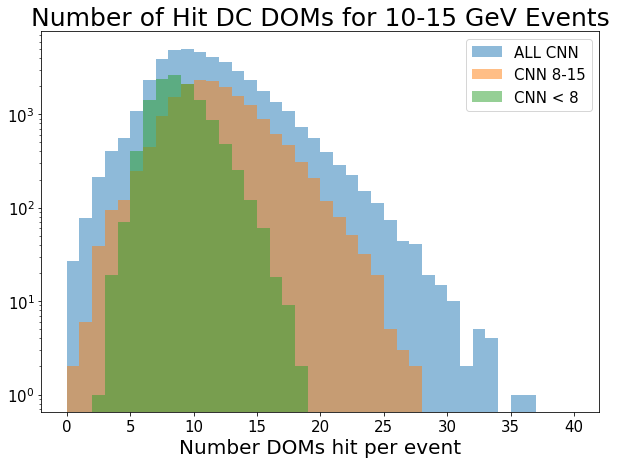

In [95]:
mask1 = true_1015
mask2 = true_1015 & cnn_815
mask3 = true_1015 & cnn_lt8
title="Number of Hit DC DOMs for 10-15 GeV Events"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask1], label="ALL CNN",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_DC[mask2], label="CNN 8-15",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_DC[mask3], label="CNN < 8",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Compare String 36 to Itself

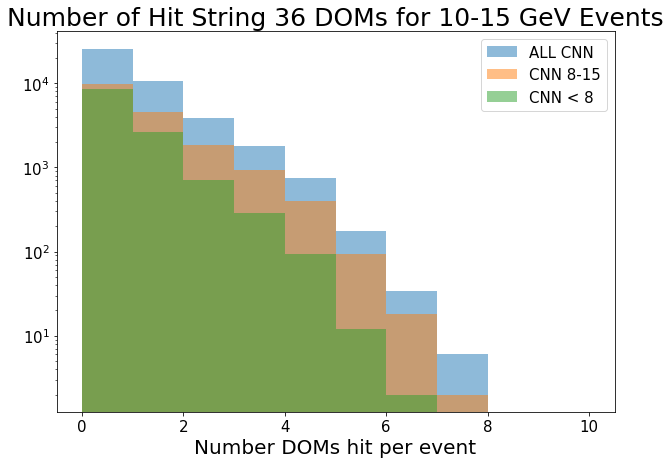

In [96]:
mask1 = true_1015
mask2 = true_1015 & cnn_815
mask3 = true_1015 & cnn_lt8
title="Number of Hit String 36 DOMs for 10-15 GeV Events"
bins=10
amin=0
amax = 10
plt.figure(figsize=(10,7))
plt.hist(number_hits_36[mask1], label="ALL CNN",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask2], label="CNN 8-15",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask3], label="CNN < 8",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Compare DC num hit doms to CNN energy

Text(0.5, 0, 'CNN Energy (GeV)')

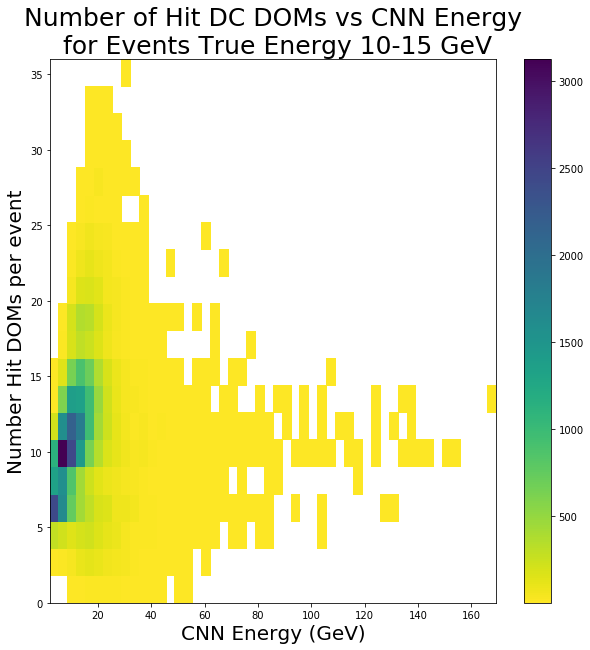

In [107]:
mask = true_1015
title="Number of Hit DC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_DC[mask],bins=[50,20],cmap='viridis_r',cmin=0.0001)
cbat = plt.colorbar()
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

Text(0.5, 0, 'CNN Energy (GeV)')

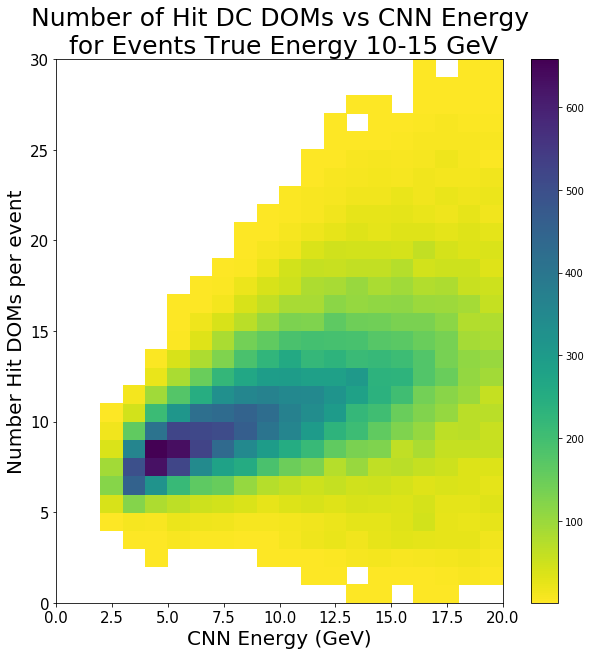

In [117]:
mask = true_1015
title="Number of Hit DC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_DC[mask],bins=[20,30],range=[[0,20],[0,30]],cmap='viridis_r',cmin=0.0001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

# Compare IC num hit doms to CNN energy

Text(0.5, 0, 'CNN Energy (GeV)')

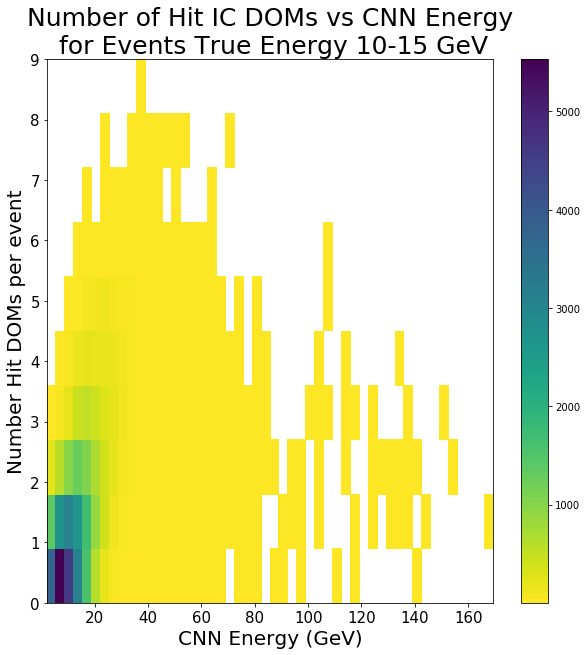

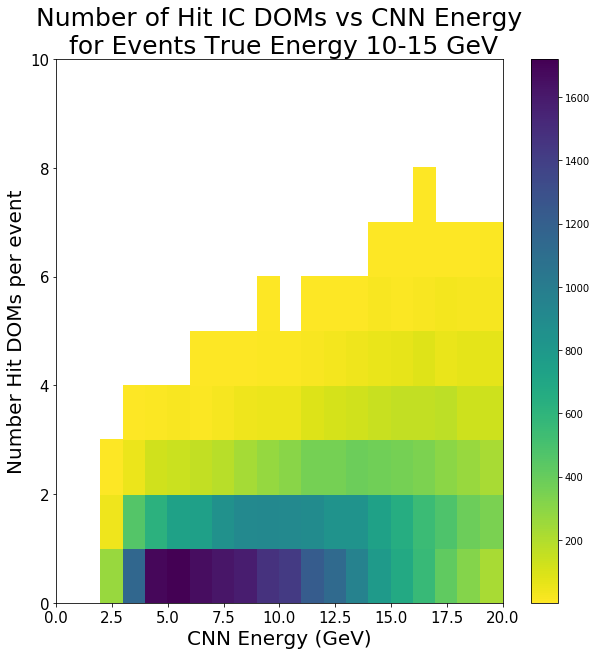

In [118]:
mask = true_1015
title="Number of Hit IC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_IC[mask],bins=[50,10],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.00001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

mask = true_1015
title="Number of Hit IC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_IC[mask],bins=[20,10],range=[[0,20],[0,10]],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.000001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

# Compare String 36 hit DOMs with cnn energy

Text(0.5, 0, 'CNN Energy (GeV)')

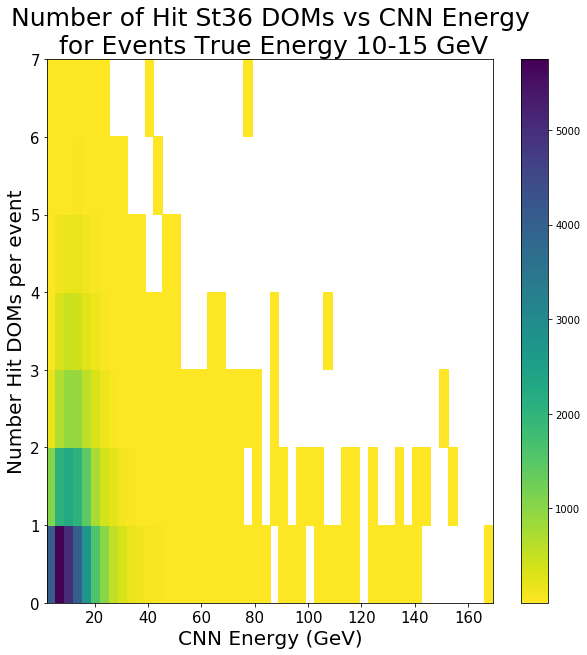

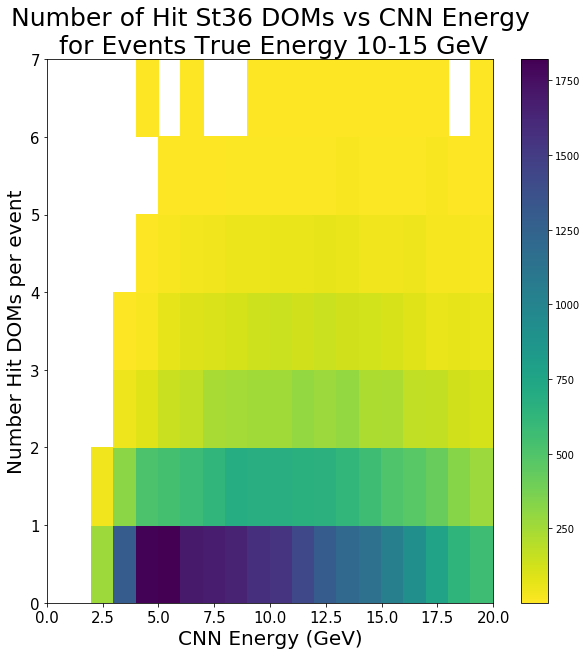

In [119]:
mask = true_1015
title="Number of Hit St36 DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_36[mask],bins=[50,7],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.00001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

mask = true_1015
title="Number of Hit St36 DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_36[mask],bins=[20,7],range=[[0,20],[0,7]],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.000001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)